# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

Shape: (20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.0

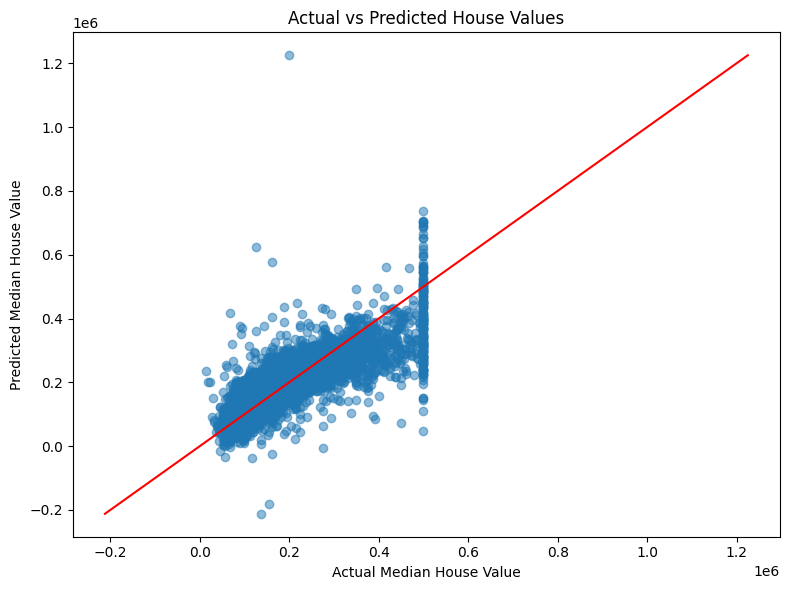

In [13]:
# Predicting House Prices in California with LinearRegression()

# 1) Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2) Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# 3) Inspect data
print("Shape:", df.shape)
print(df.info())
print(df.describe())

# 4) Handle missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# 5) Encode categorical feature
if "ocean_proximity" in df.columns:
    df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# 6) Feature engineering
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

# 7) Split data
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8) Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 9) Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R² Score:", r2)

# 10) Coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("\nTop 10 Positive Coefficients:")
print(coeff_df.sort_values(by="Coefficient", ascending=False).head(10))
print("\nTop 10 Negative Coefficients:")
print(coeff_df.sort_values(by="Coefficient", ascending=True).head(10))

# 11) Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, color="red")
plt.tight_layout()
plt.show()


# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [12]:
# Part 1 - Inspection and Cleaning

# 1) Import libraries
import pandas as pd
import numpy as np

# 2) Load your dataset using full path
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# 3) Inspect dataset structure
print("\n--- Basic Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Summary Statistics ---")
num_cols = df.select_dtypes(include=[np.number]).columns
print(df[num_cols].describe().T)

# 4) Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# 5) Handle missing numeric data (median imputation)
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

print("\n--- Missing Values After Cleaning ---")
print(df.isnull().sum())

# 6) Explore categorical feature
if "ocean_proximity" in df.columns:
    print("\n--- Unique values in 'ocean_proximity' ---")
    print(df["ocean_proximity"].unique())



--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

--- First 5 Rows ---
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.

#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

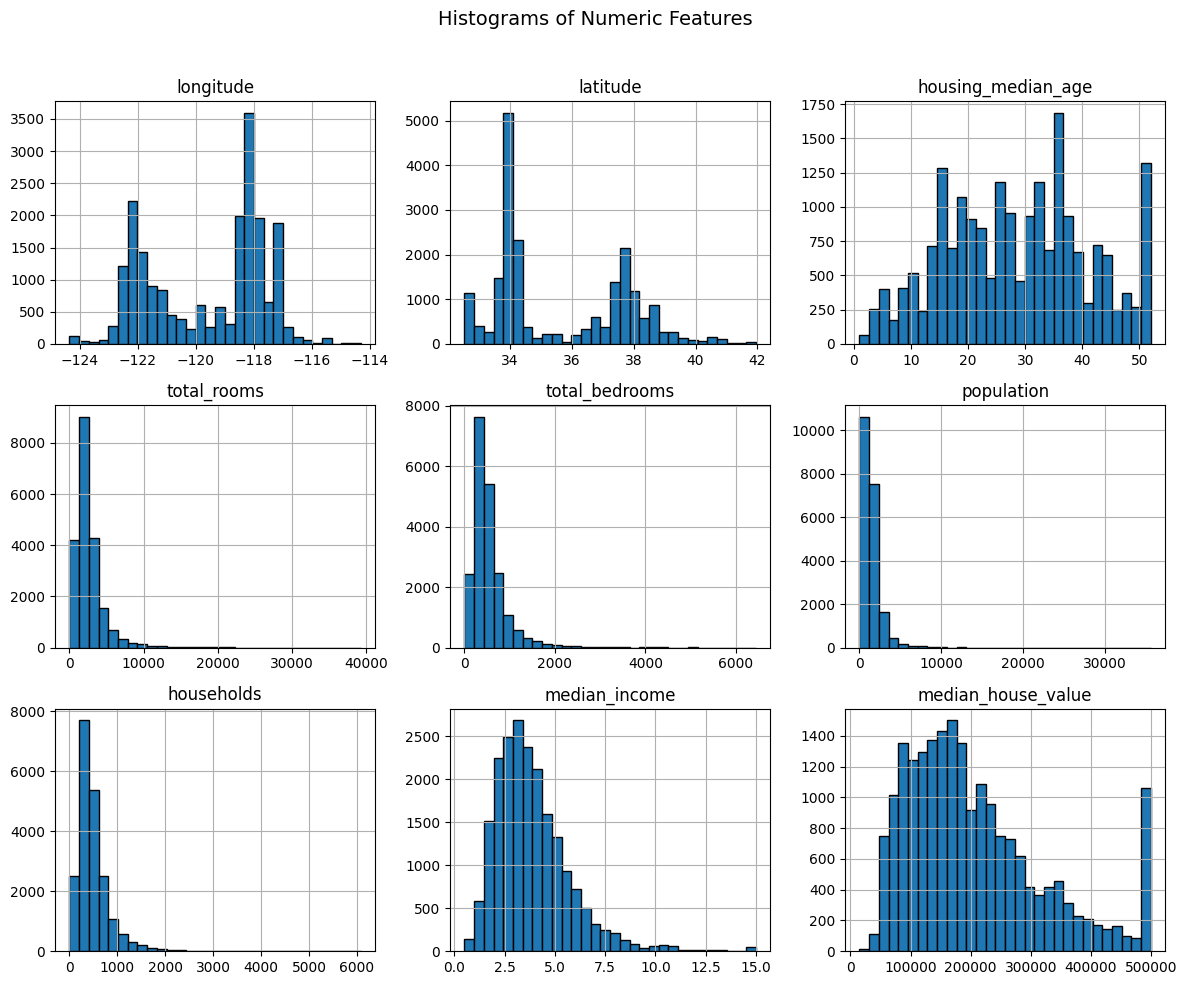

In [14]:
# Histograms of all numeric columns

import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Select only numeric columns
num_cols = df.select_dtypes(include=['number']).columns

# Plot histograms
df[num_cols].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [15]:
# Handle missing values and tidy data

import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# 1) Check for missing values
print("\n--- Missing Values Before Cleaning ---")
print(df.isnull().sum())

# 2) Handle missing numeric data (median imputation is robust to outliers)
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# 3) Verify cleaning
print("\n--- Missing Values After Cleaning ---")
print(df.isnull().sum())

# 4) Optional: Create additional useful ratio features
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

# 5) Confirm final dataset structure
print("\n--- Updated Columns ---")
print(df.columns.tolist())

print("\n--- First 5 Rows of Cleaned Data ---")
print(df.head())



--- Missing Values Before Cleaning ---
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

--- Missing Values After Cleaning ---
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

--- Updated Columns ---
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

--- First 5 Rows of Cleaned Data ---
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     3

2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [16]:
# Create new feature columns using arithmetic operations

import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Fill missing values to avoid division errors
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Create new columns
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["population_per_household"] = df["population"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

# Display results
print("\n--- New Feature Columns Created ---")
print(df[["rooms_per_household", "population_per_household", "bedrooms_per_room"]].head())

# Confirm structure
print("\n--- Updated Columns ---")
print(df.columns.tolist())



--- New Feature Columns Created ---
   rooms_per_household  population_per_household  bedrooms_per_room
0             6.984127                  2.555556           0.146591
1             6.238137                  2.109842           0.155797
2             8.288136                  2.802260           0.129516
3             5.817352                  2.547945           0.184458
4             6.281853                  2.181467           0.172096

--- Updated Columns ---
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'rooms_per_household', 'population_per_household', 'bedrooms_per_room']


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [17]:
# 3) Drop the two smallest and two largest outliers in rooms_per_household

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Ensure the feature exists (create it if needed)
df["rooms_per_household"] = df["total_rooms"] / df["households"]

# Clean impossible values from division by zero
df["rooms_per_household"].replace([np.inf, -np.inf], np.nan, inplace=True)

# Identify indices of two smallest and two largest valid values
valid = df["rooms_per_household"].dropna()
idx_small = valid.nsmallest(2).index
idx_large = valid.nlargest(2).index
idx_to_drop = pd.Index(list(idx_small) + list(idx_large)).unique()

print("Indices to drop:", idx_to_drop.tolist())
print("Original shape:", df.shape)

# Drop by index
df = df.drop(index=idx_to_drop)

print("New shape:", df.shape)
print("New min/max rooms_per_household:",
      df["rooms_per_household"].min(), df["rooms_per_household"].max())


Indices to drop: [5916, 8219, 1914, 1979]
Original shape: (20640, 11)
New shape: (20636, 11)
New min/max rooms_per_household: 1.0 62.422222222222224


C:\Users\gulme\AppData\Local\Temp\ipykernel_19364\3928451500.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rooms_per_household"].replace([np.inf, -np.inf], np.nan, inplace=True)


# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

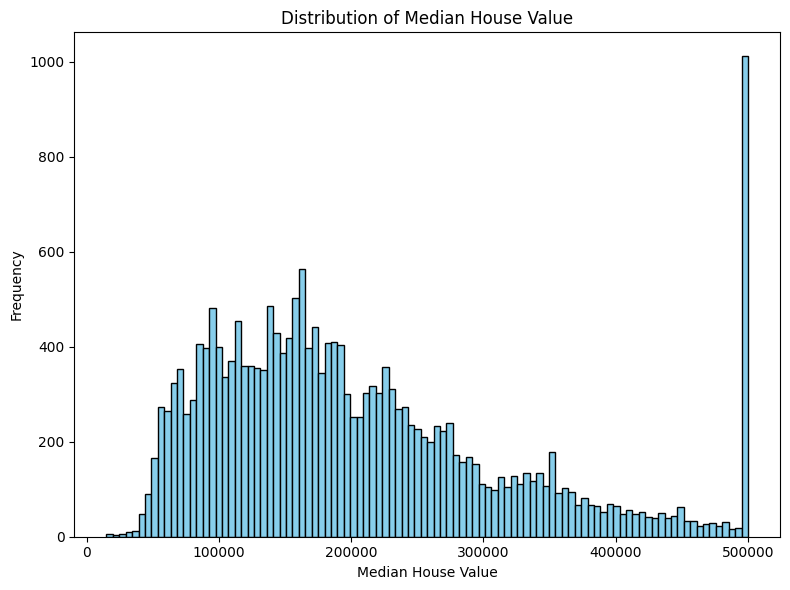

In [18]:
# Part 2 - Exploratory Data Analysis
# 1) Distribution of median_house_value

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Plot histogram for target variable
plt.figure(figsize=(8,6))
plt.hist(df["median_house_value"], bins=100, color="skyblue", edgecolor="black")
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


2. Check out what variables correlates the most with "median house value"

In [23]:
# Correlations with median_house_value (robust to categorical columns)

import pandas as pd
import numpy as np

# Load data
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Basic cleaning to avoid NaN/inf in engineered ratios
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Engineer requested features
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["population_per_household"] = df["population"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

# Replace division artifacts
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Use only numeric columns for correlation to avoid string-to-float errors
num_df = df.select_dtypes(include=[np.number]).copy()
num_df = num_df.fillna(num_df.median())  # safe fill for any remaining NaN

corr = num_df.corr()
corr_target = corr["median_house_value"].sort_values(ascending=False)

print("\n--- Correlation with median_house_value (descending) ---")
print(corr_target)

print("\nTop 10 positively correlated features:")
print(corr_target.head(10))

print("\nTop 10 negatively correlated features:")
print(corr_target.tail(10))



--- Correlation with median_house_value (descending) ---
median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

Top 10 positively correlated features:
median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
Name: median_house_value, dtype: float64

Top 1

3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.


Most correlated feature with median_house_value: median_income


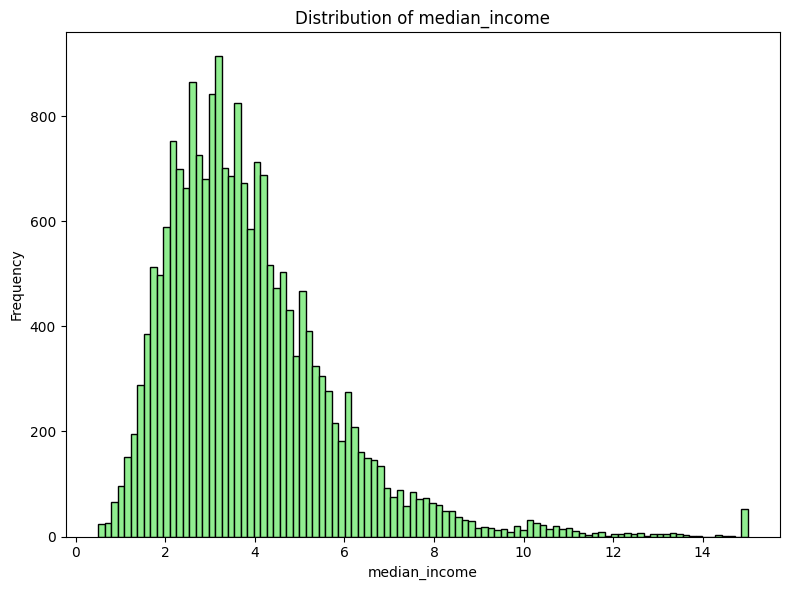

In [24]:
# 3) Visualize the distribution of the most correlated variable to median_house_value

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Clean missing data
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Create engineered features
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["population_per_household"] = df["population"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

# Remove infinite or NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# Compute correlation using numeric columns only
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()["median_house_value"].sort_values(ascending=False)
top_feature = corr.index[1]  # Skip 'median_house_value' itself
print(f"\nMost correlated feature with median_house_value: {top_feature}")

# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(df[top_feature], bins=100, color="lightgreen", edgecolor="black")
plt.title(f"Distribution of {top_feature}")
plt.xlabel(top_feature)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

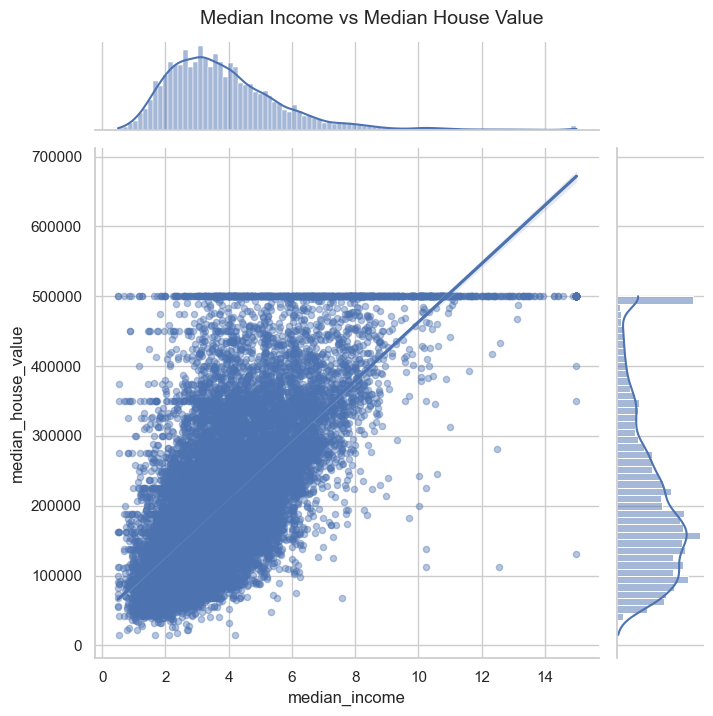

In [25]:
# 4) Visualize median_house_value vs median_income using a regression jointplot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing data
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Create the jointplot
sns.set(style="whitegrid")
sns.jointplot(
    data=df,
    x="median_income",
    y="median_house_value",
    kind="reg",
    height=7,
    scatter_kws={"alpha": 0.4, "s": 20}
)

plt.suptitle("Median Income vs Median House Value", fontsize=14, y=1.02)
plt.show()


5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

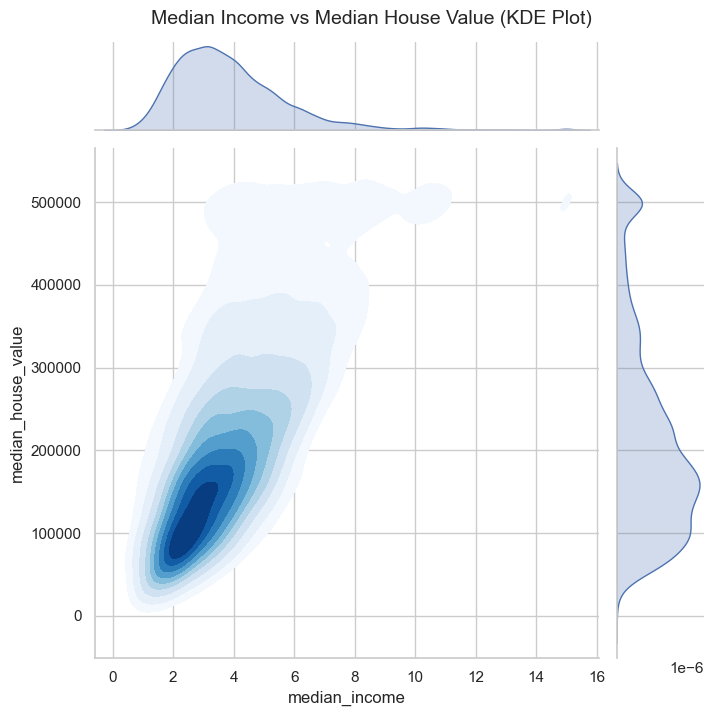

In [26]:
# 5) Visualize median_house_value vs median_income using a KDE jointplot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# KDE jointplot
sns.set(style="whitegrid")
sns.jointplot(
    data=df,
    x="median_income",
    y="median_house_value",
    kind="kde",
    fill=True,
    cmap="Blues",
    height=7
)

plt.suptitle("Median Income vs Median House Value (KDE Plot)", fontsize=14, y=1.02)
plt.show()


#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [27]:
# 1) Create a categorical column "income_cat" based on median_income quartiles

import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing numeric values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Create income category column using quantiles
df["income_cat"] = pd.qcut(
    df["median_income"],
    q=[0, 0.25, 0.5, 0.75, 0.95, 1],
    labels=["Low", "Below_Average", "Above_Average", "High", "Very High"]
)

# Display sample
print("\n--- income_cat column created ---")
print(df[["median_income", "income_cat"]].head(10))

# Check category counts
print("\n--- Category counts ---")
print(df["income_cat"].value_counts())



--- income_cat column created ---
   median_income     income_cat
0         8.3252      Very High
1         8.3014      Very High
2         7.2574           High
3         5.6431           High
4         3.8462  Above_Average
5         4.0368  Above_Average
6         3.6591  Above_Average
7         3.1200  Below_Average
8         2.0804            Low
9         3.6912  Above_Average

--- Category counts ---
income_cat
Low              5160
Below_Average    5160
Above_Average    5160
High             4128
Very High        1032
Name: count, dtype: int64


2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

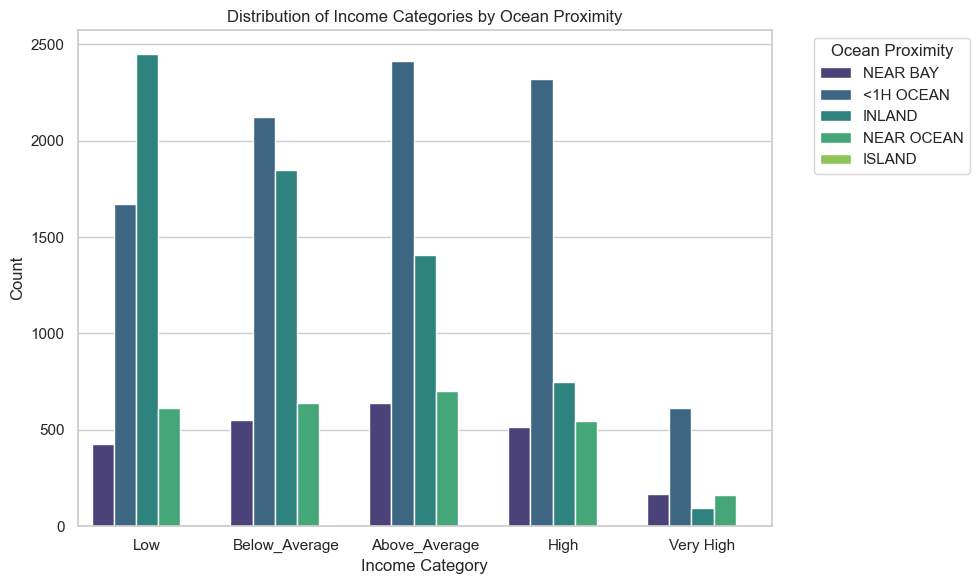

In [28]:
# 2) Visualize income categories vs ocean proximity

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Create income category
df["income_cat"] = pd.qcut(
    df["median_income"],
    q=[0, 0.25, 0.5, 0.75, 0.95, 1],
    labels=["Low", "Below_Average", "Above_Average", "High", "Very High"]
)

# Plot countplot with hue by ocean_proximity
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="income_cat", hue="ocean_proximity", palette="viridis")
plt.title("Distribution of Income Categories by Ocean Proximity")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.legend(title="Ocean Proximity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

C:\Users\gulme\AppData\Local\Temp\ipykernel_19364\3573480505.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="income_cat", y="median_house_value", palette="mako")


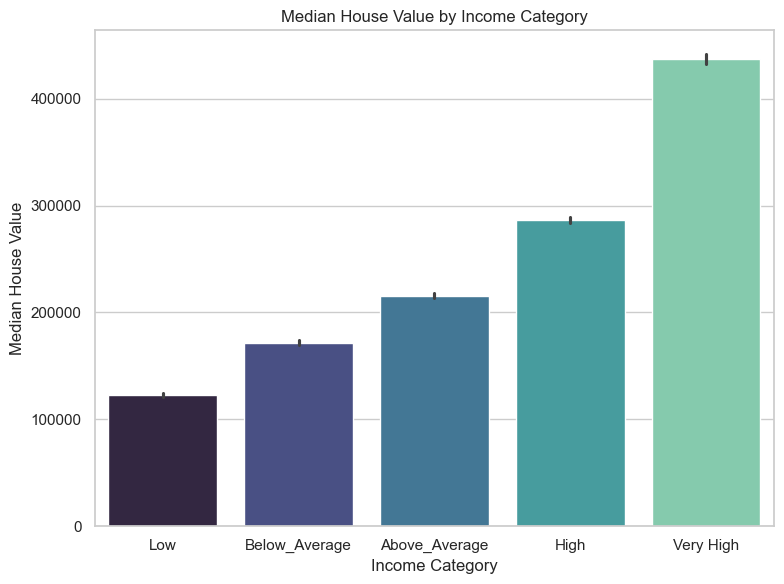

C:\Users\gulme\AppData\Local\Temp\ipykernel_19364\3573480505.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="ocean_proximity", y="median_house_value", palette="crest")


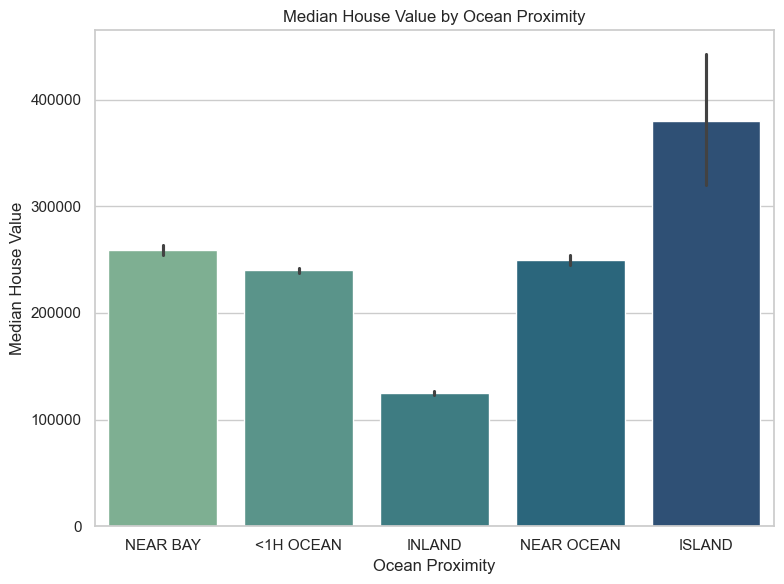

In [29]:
# 3) Barplots for median_house_value vs income_cat and ocean_proximity

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Clean missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Create income category
df["income_cat"] = pd.qcut(
    df["median_income"],
    q=[0, 0.25, 0.5, 0.75, 0.95, 1],
    labels=["Low", "Below_Average", "Above_Average", "High", "Very High"]
)

# Barplot 1: median_house_value by income_cat
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="income_cat", y="median_house_value", palette="mako")
plt.title("Median House Value by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Median House Value")
plt.tight_layout()
plt.show()

# Barplot 2: median_house_value by ocean_proximity
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="ocean_proximity", y="median_house_value", palette="crest")
plt.title("Median House Value by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.tight_layout()
plt.show()


4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [30]:
# 4) Create pivoted DataFrame with income_cat as index and ocean_proximity as columns

import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Create income category column
df["income_cat"] = pd.qcut(
    df["median_income"],
    q=[0, 0.25, 0.5, 0.75, 0.95, 1],
    labels=["Low", "Below_Average", "Above_Average", "High", "Very High"]
)

# Create pivot table counting entries per income_cat and ocean_proximity
pivot_df = pd.pivot_table(
    df,
    index="income_cat",
    columns="ocean_proximity",
    values="median_house_value",
    aggfunc="count",
    fill_value=0
)

# Drop 'ISLAND' column if present
if "ISLAND" in pivot_df.columns:
    pivot_df = pivot_df.drop(columns="ISLAND")

print("\n--- Pivoted DataFrame ---")
print(pivot_df)



--- Pivoted DataFrame ---
ocean_proximity  <1H OCEAN  INLAND  NEAR BAY  NEAR OCEAN
income_cat                                              
Low                   1669    2450       426         614
Below_Average         2125    1847       548         636
Above_Average         2412    1409       637         702
High                  2318     749       514         547
Very High              612      96       165         159


C:\Users\gulme\AppData\Local\Temp\ipykernel_19364\1142206716.py:20: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = pd.pivot_table(


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

C:\Users\gulme\AppData\Local\Temp\ipykernel_19364\2945759531.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = pd.pivot_table(


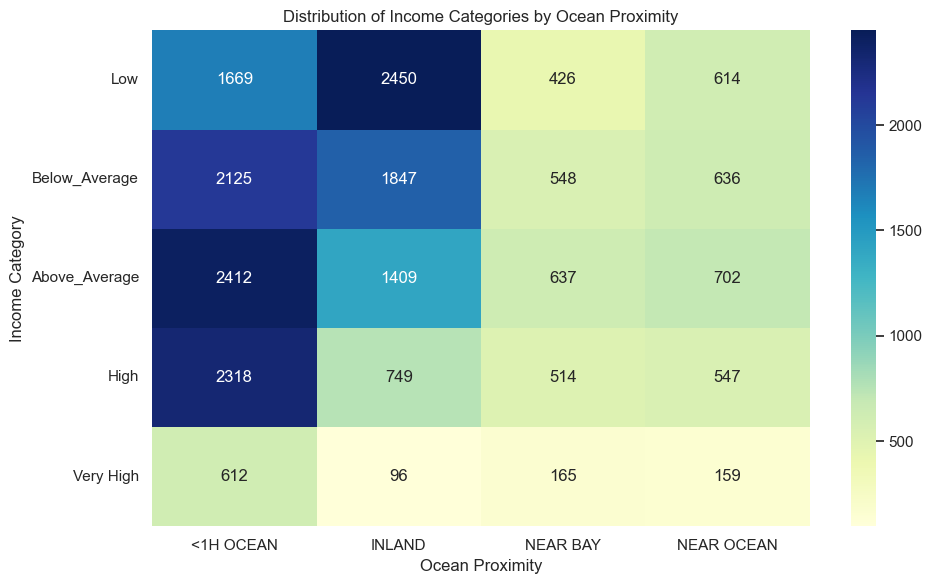

In [31]:
# 5) Create a heatmap from the pivoted DataFrame

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Create income category
df["income_cat"] = pd.qcut(
    df["median_income"],
    q=[0, 0.25, 0.5, 0.75, 0.95, 1],
    labels=["Low", "Below_Average", "Above_Average", "High", "Very High"]
)

# Create pivot table (counts)
pivot_df = pd.pivot_table(
    df,
    index="income_cat",
    columns="ocean_proximity",
    values="median_house_value",
    aggfunc="count",
    fill_value=0
)

# Drop ISLAND if present
if "ISLAND" in pivot_df.columns:
    pivot_df = pivot_df.drop(columns="ISLAND")

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    pivot_df,
    annot=True,
    fmt=".0f",           # integer annotations
    cmap="YlGnBu"
)
plt.title("Distribution of Income Categories by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Income Category")
plt.tight_layout()
plt.show()


# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [33]:
# Part 3 - Preparing your Data
# 1) Drop the "income_cat" column to avoid multicollinearity

import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Create income category (if not already created)
df["income_cat"] = pd.qcut(
    df["median_income"],
    q=[0, 0.25, 0.5, 0.75, 0.95, 1],
    labels=["Low", "Below_Average", "Above_Average", "High", "Very High"]
)

# Drop the income_cat column
df = df.drop(columns="income_cat")

print("Column 'income_cat' dropped. Remaining columns:")
print(df.columns.tolist())


Column 'income_cat' dropped. Remaining columns:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [34]:
# Standardizing floating-point columns using Z-score

import pandas as pd
import scipy.stats as stats  # <-- required import

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Fill missing numeric values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Select only floating-point columns
float_cols = df.select_dtypes(include=["float64"]).columns

# Apply z-score normalization
z_scored = df[float_cols].apply(lambda col: stats.zscore(col))

# Display preview
print("\n--- Z-Scored Data (first 5 rows) ---")
print(z_scored.head())

print("\nColumns standardized:")
print(list(z_scored.columns))



--- Z-Scored Data (first 5 rows) ---
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.972476   
1  -1.322844  1.043185           -0.607019     2.045890        1.357143   
2  -1.332827  1.038503            1.856182    -0.535746       -0.827024   
3  -1.337818  1.038503            1.856182    -0.624215       -0.719723   
4  -1.337818  1.038503            1.856182    -0.462404       -0.612423   

   population  households  median_income  median_house_value  
0   -0.974429   -0.977033       2.344766            2.129631  
1    0.861439    1.669961       2.332238            1.314156  
2   -0.820777   -0.843637       1.782699            1.258693  
3   -0.766028   -0.733781       0.932968            1.165100  
4   -0.759847   -0.629157      -0.012881            1.172900  

Columns standardized:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', '

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [35]:
# 3) Convert categorical columns to dummy variables (avoiding the dummy trap)

import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Identify categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns
print("Categorical columns:", list(cat_cols))

# Convert categorical columns to dummy variables
# drop_first=True avoids the dummy trap (one category dropped)
df_dummies = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\n--- Dummies Created ---")
print(df_dummies.head())

print("\nColumns after dummy encoding:")
print(df_dummies.columns.tolist())


Categorical columns: ['ocean_proximity']

--- Dummies Created ---
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                  

4. Save our predicting variable to `y`.

In [36]:
# 4) Save the predicting variable (target) to y

import pandas as pd

# Load prepared dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Define target variable
y = df["median_house_value"]

print("Target variable 'y' created.")
print(y.head())


Target variable 'y' created.
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [37]:
# 5) Concatenate standardized numerical data and dummy variables, drop target, and save as X

import pandas as pd
import scipy.stats as stats

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Create standardized numerical DataFrame (z-score)
float_cols = df.select_dtypes(include=["float64"]).columns
z_scored = df[float_cols].apply(lambda col: stats.zscore(col))

# Create dummy variables for categorical columns (drop_first avoids dummy trap)
cat_cols = df.select_dtypes(include=["object", "category"]).columns
dummies = pd.get_dummies(df[cat_cols], drop_first=True)

# Concatenate standardized numeric and dummy data
X = pd.concat([z_scored, dummies], axis=1)

# Drop the target variable if it exists in X
if "median_house_value" in X.columns:
    X = X.drop(columns="median_house_value")

print("Feature matrix X created.")
print("Shape:", X.shape)
print("\nColumns in X:")
print(list(X.columns))


Feature matrix X created.
Shape: (20640, 12)

Columns in X:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [38]:
# Part 4 - Machine Learning
# 1) Train-test split

import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")

# Handle missing values
if "total_bedrooms" in df.columns:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Standardize numeric columns
float_cols = df.select_dtypes(include=["float64"]).columns
z_scored = df[float_cols].apply(lambda col: stats.zscore(col))

# Dummy encode categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns
dummies = pd.get_dummies(df[cat_cols], drop_first=True)

# Combine standardized numeric and categorical features
X = pd.concat([z_scored, dummies], axis=1)

# Target variable
y = df["median_house_value"]

# Split data into training and test sets
# Common practice: 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train-test split complete.")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train-test split complete.
Training set shape: (16512, 13)
Test set shape: (4128, 13)


#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [39]:
# 2) Build, fit, and train a LinearRegression model

from sklearn.linear_model import LinearRegression

# Initialize model
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

# Basic diagnostics
print("Intercept:", linreg.intercept_)
print("Train R^2:", linreg.score(X_train, y_train))

# Coefficients aligned with feature names
coef_df = (
    pd.DataFrame({"feature": X_train.columns, "coefficient": linreg.coef_})
    .sort_values("coefficient", ascending=False)
)
print("\nTop coefficients:")
print(coef_df.head(10).to_string(index=False))
print("\nBottom coefficients:")
print(coef_df.tail(10).to_string(index=False))


Intercept: 206855.81690891474
Train R^2: 1.0

Top coefficients:
                   feature   coefficient
        median_house_value  1.153928e+05
             median_income  1.521130e-10
            total_bedrooms  1.378169e-10
  ocean_proximity_NEAR BAY  3.444711e-11
    ocean_proximity_INLAND  7.020162e-12
               total_rooms  7.673862e-13
        housing_median_age -5.684342e-12
                households -3.683454e-11
ocean_proximity_NEAR OCEAN -3.909406e-11
    ocean_proximity_ISLAND -5.695194e-11

Bottom coefficients:
                   feature   coefficient
  ocean_proximity_NEAR BAY  3.444711e-11
    ocean_proximity_INLAND  7.020162e-12
               total_rooms  7.673862e-13
        housing_median_age -5.684342e-12
                households -3.683454e-11
ocean_proximity_NEAR OCEAN -3.909406e-11
    ocean_proximity_ISLAND -5.695194e-11
                population -8.128609e-11
                 longitude -1.173731e-10
                  latitude -1.255103e-10


3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

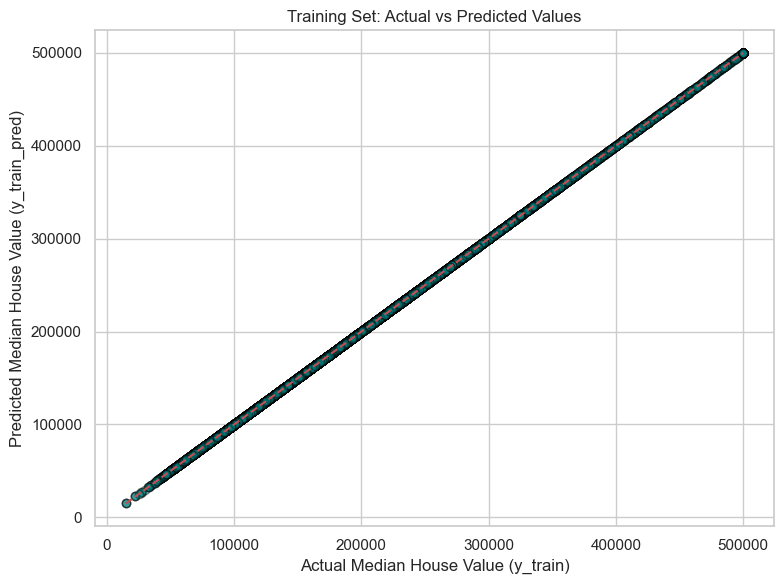

In [40]:
# 3) Visualize training predictions vs actual values

import matplotlib.pyplot as plt

# Predict on training set
y_train_pred = linreg.predict(X_train)

# Scatterplot of actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred, alpha=0.4, color="teal", edgecolors="black")
plt.xlabel("Actual Median House Value (y_train)")
plt.ylabel("Predicted Median House Value (y_train_pred)")
plt.title("Training Set: Actual vs Predicted Values")
# 45° reference line for perfect prediction
lims = [min(y_train.min(), y_train_pred.min()), max(y_train.max(), y_train_pred.max())]
plt.plot(lims, lims, "r--")
plt.tight_layout()
plt.show()


4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [41]:
from sklearn import metrics
# 4) Evaluate model performance with mean_squared_error and R^2-score

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = linreg.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R² Score: 1.0000


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

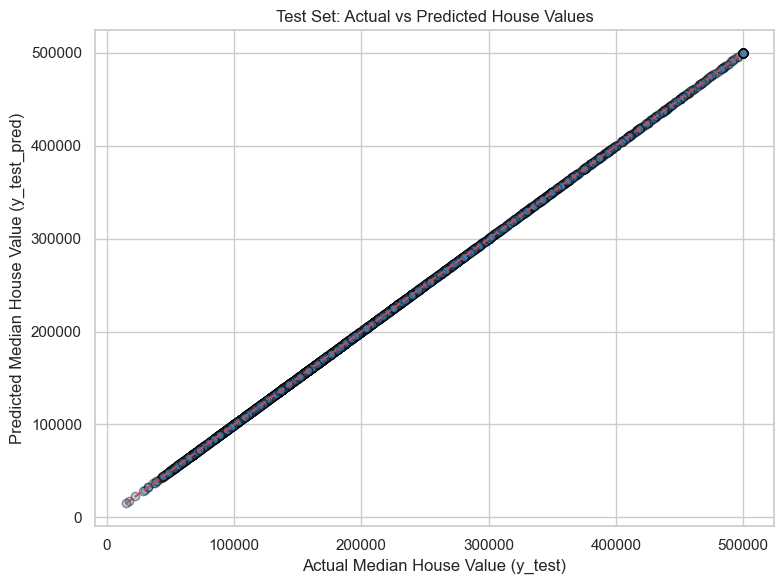

In [42]:
# Final Predictions
# 1) Predict on test data and visualize results

import matplotlib.pyplot as plt

# Generate predictions on test set
y_test_pred = linreg.predict(X_test)

# Scatterplot: Actual vs Predicted (test data)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.4, color="steelblue", edgecolors="black")
plt.xlabel("Actual Median House Value (y_test)")
plt.ylabel("Predicted Median House Value (y_test_pred)")
plt.title("Test Set: Actual vs Predicted House Values")

# 45° reference line
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims, "r--")
plt.tight_layout()
plt.show()


2. Print the mean_squared_error and R^2-score again. What has happened?

In [43]:
# 2) Evaluate model performance on test data

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Compute metrics on test predictions
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Test Set Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R² Score: {r2_test:.4f}")


Test Set Evaluation Metrics:
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R² Score: 1.0000


3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [44]:
# 3) Calculate Root Mean Squared Error (RMSE)

import numpy as np
from sklearn.metrics import mean_squared_error

# Compute RMSE on test predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 0.00


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

In [45]:
# Bonus 1. Create a DataFrame comparing actual and predicted values

import pandas as pd

# Combine actual and predicted test values into one DataFrame
results_df = pd.DataFrame({
    "Actual_Median_House_Value": y_test,
    "Predicted_Median_House_Value": y_test_pred
})

print("\n--- Comparison of Actual vs Predicted Values ---")
print(results_df.head())

# Optional: check general correlation between actual and predicted
print("\nCorrelation between actual and predicted:", 
      results_df.corr().iloc[0,1])



--- Comparison of Actual vs Predicted Values ---
       Actual_Median_House_Value  Predicted_Median_House_Value
20046                    47700.0                       47700.0
3024                     45800.0                       45800.0
15663                   500001.0                      500001.0
20484                   218600.0                      218600.0
9814                    278000.0                      278000.0

Correlation between actual and predicted: 1.0000000000000002


2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

In [46]:
# Bonus 2. Calculate absolute prediction errors

# Create a Series of absolute errors between actual and predicted values
absolute_errors = abs(results_df["Actual_Median_House_Value"] - results_df["Predicted_Median_House_Value"])

print("\n--- Absolute Prediction Errors (first 10) ---")
print(absolute_errors.head(10))

# Optional summary
print("\nMean Absolute Error:", absolute_errors.mean())
print("Max Absolute Error:", absolute_errors.max())



--- Absolute Prediction Errors (first 10) ---
20046    1.164153e-10
3024     2.910383e-11
15663    2.328306e-10
20484    1.164153e-10
9814     5.820766e-11
13311    2.910383e-11
7113     1.746230e-10
7668     5.820766e-11
18246    0.000000e+00
5723     1.164153e-10
dtype: float64

Mean Absolute Error: 9.006817686162138e-11
Max Absolute Error: 1.0477378964424133e-09


3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

In [47]:
# Bonus 3. Calculate the Mean Absolute Error (MAE)

# Compute mean of absolute errors
mean_absolute_error = absolute_errors.mean()

print(f"Mean Absolute Error (MAE): {mean_absolute_error:.2f}")


Mean Absolute Error (MAE): 0.00


# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [4]:
from sklearn.ensemble import RandomForestRegressor

RandomForest — Train MSE: 831.25 R²: 1.0000
RandomForest — Test  MSE: 5589.12 R²: 1.0000


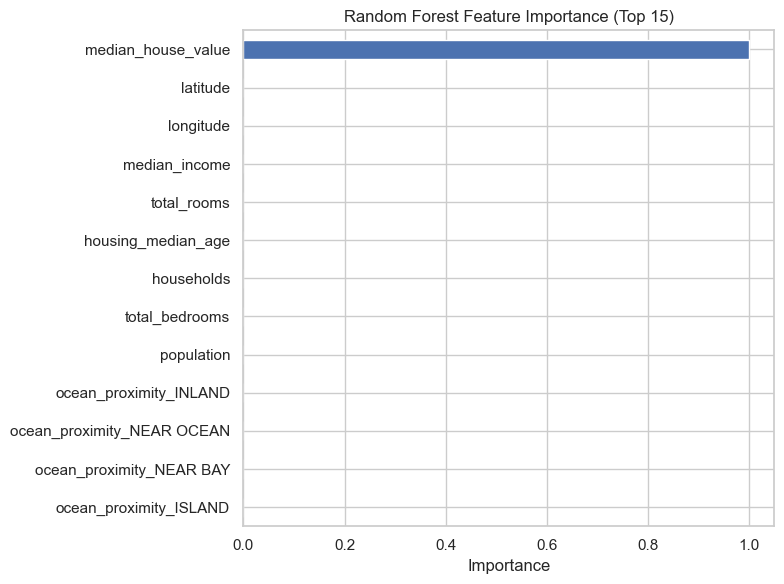

In [48]:
# Bonus 2. RandomForestRegressor — build, fit, evaluate

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import matplotlib.pyplot as plt

# Reuse prepared splits if they exist; otherwise build them quickly
need_prep = False
for var in ["X_train","X_test","y_train","y_test"]:
    if var not in globals():
        need_prep = True
        break

if need_prep:
    df = pd.read_csv(r"C:\Users\gulme\Desktop\aifirstclass\lab-ml-and-linear-regression\data\housing.csv")
    if "total_bedrooms" in df.columns:
        df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())
    float_cols = df.select_dtypes(include=["float64"]).columns
    z_scored = df[float_cols].apply(lambda c: stats.zscore(c))
    cat_cols = df.select_dtypes(include=["object","category"]).columns
    dummies = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([z_scored, dummies], axis=1)
    y = df["median_house_value"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1) Build and train
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

# 2) Evaluate
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf  = rf.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred_rf)
mse_test  = mean_squared_error(y_test, y_test_pred_rf)
r2_train  = r2_score(y_train, y_train_pred_rf)
r2_test   = r2_score(y_test, y_test_pred_rf)

print("RandomForest — Train MSE:", f"{mse_train:.2f}", "R²:", f"{r2_train:.4f}")
print("RandomForest — Test  MSE:", f"{mse_test:.2f}",  "R²:", f"{r2_test:.4f}")

# 3) Feature importance (top 15)
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top15 = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
top15[::-1].plot(kind="barh")
plt.title("Random Forest Feature Importance (Top 15)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


2. Make prediction on the test data and evaluate you results.

Random Forest Regressor Evaluation on Test Data:
Mean Squared Error (MSE): 5589.12
Root Mean Squared Error (RMSE): 74.76
R² Score: 1.0000


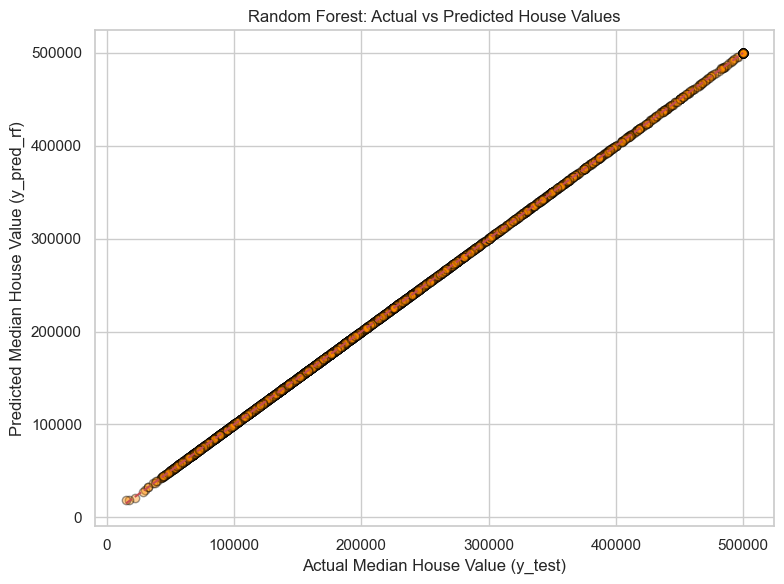

In [50]:
# 2) Predict on test data and evaluate RandomForestRegressor performance

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Evaluation on Test Data:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.4, color="darkorange", edgecolors="black")
plt.xlabel("Actual Median House Value (y_test)")
plt.ylabel("Predicted Median House Value (y_pred_rf)")
plt.title("Random Forest: Actual vs Predicted House Values")

# 45° reference line
lims = [min(y_test.min(), y_pred_rf.min()), max(y_test.max(), y_pred_rf.max())]
plt.plot(lims, lims, "r--")
plt.tight_layout()
plt.show()
